# Modeling - Spotify Standard Scaled Dataset
Este notebook entrena un modelo de regresión para predecir `popularity`.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar datos
df = pd.read_csv("../data/processed/spotify_standard.csv")
X = df.drop("popularity", axis=1)
y = df["popularity"]

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


In [ ]:
# Entrenar Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

ValueError: could not convert string to float: 'Rod Wave'

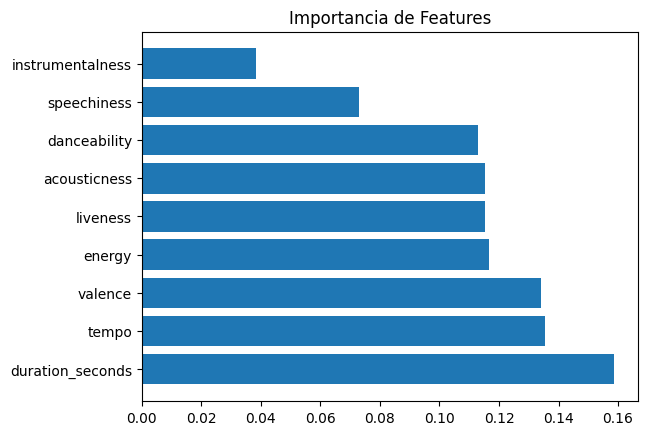

In [ ]:
# Importancia de features
import matplotlib.pyplot as plt

importances = model.feature_importances_
feat_names = X.columns
indices = importances.argsort()[::-1]

plt.barh(feat_names[indices], importances[indices])
plt.title("Importancia de Features")
plt.show()